<a href="https://colab.research.google.com/github/muktasidrahman/Micro_credentials/blob/main/GroupProject_Unit4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


`**Step 1: Performing EDA**



> View of the dataframe



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv')
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


> length of dataframe

In [ ]:
len(df)

101766

> Shape of the dataframe: 101766 rows and 50 columns

In [ ]:
df.shape

(101766, 50)

> Size of the dataframe

In [ ]:
df.size

5088300

> Looking at how many weight values are missing

In [ ]:
df['weight'].value_counts(normalize=True)[0]*100# 0 because when you print it '?' is at 0 index

96.85847925633315

> Looking at the readmitted column



In [ ]:
df_readmitted = df['readmitted']
df_readmitted.head()

0     NO
1    >30
2     NO
3     NO
4     NO
Name: readmitted, dtype: object

> Replacing all '?' with NaN

In [ ]:
patient_data_df_01 = df.copy()
patient_data_df_clean = patient_data_df_01.replace('?',np.NaN)
patient_data_missing_values = patient_data_df_clean.isnull().sum()
patient_data_df_clean


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
patient_data_missing_values

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
print("% of missing values for each column")
missing_values_more_than_80=[]
for column in patient_data_df_clean.columns:
  print(column,patient_data_missing_values[column]/101766*100,"%") #101766 from df.shape done above
  if patient_data_missing_values[column]/101766*100>80:
    missing_values_more_than_80.append(column)
print(missing_values_more_than_80)

% of missing values for each column
encounter_id 0.0 %
patient_nbr 0.0 %
race 2.2335554114340743 %
gender 0.0 %
age 0.0 %
weight 96.85847925633315 %
admission_type_id 0.0 %
discharge_disposition_id 0.0 %
admission_source_id 0.0 %
time_in_hospital 0.0 %
payer_code 39.5574160328597 %
medical_specialty 49.08220820313268 %
num_lab_procedures 0.0 %
num_procedures 0.0 %
num_medications 0.0 %
number_outpatient 0.0 %
number_emergency 0.0 %
number_inpatient 0.0 %
diag_1 0.02063557573256294 %
diag_2 0.3517874339170253 %
diag_3 1.398305917497003 %
number_diagnoses 0.0 %
max_glu_serum 0.0 %
A1Cresult 0.0 %
metformin 0.0 %
repaglinide 0.0 %
nateglinide 0.0 %
chlorpropamide 0.0 %
glimepiride 0.0 %
acetohexamide 0.0 %
glipizide 0.0 %
glyburide 0.0 %
tolbutamide 0.0 %
pioglitazone 0.0 %
rosiglitazone 0.0 %
acarbose 0.0 %
miglitol 0.0 %
troglitazone 0.0 %
tolazamide 0.0 %
examide 0.0 %
citoglipton 0.0 %
insulin 0.0 %
glyburide-metformin 0.0 %
glipizide-metformin 0.0 %
glimepiride-pioglitazone 0.0 %
met

So, only weight has more than 80% missing values

In [ ]:
#patient_data_df_clean.drop(['admission_type_id','weight','payer_code','max_glu_serum','number_emergency','A1Cresult','medical_specialty','race','gender'], axis = 1, inplace = True)

In [ ]:
patient_data_df_clean = patient_data_df_clean[['readmitted','insulin','number_inpatient','time_in_hospital']]

In [ ]:
patient_data_df_clean

,readmitted,insulin,number_inpatient,time_in_hospital
0,NO,No,0,1
1,>30,Up,0,3
2,NO,No,1,2
3,NO,Up,0,2
4,NO,Steady,0,1
...,...,...,...,...
101761,>30,Down,0,3
101762,NO,Steady,1,5
101763,NO,Down,0,1
101764,NO,Up,1,10


In [ ]:
patient_data_df_clean
patient_data_df_clean['readmitted'] = patient_data_df_clean['readmitted'].replace(['NO'],'0')
patient_data_df_clean['readmitted'] = patient_data_df_clean['readmitted'].replace(['<30'],'1')
patient_data_df_clean['readmitted'] = patient_data_df_clean['readmitted'].replace(['>30'],'2')
patient_data_df_clean.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,readmitted,insulin,number_inpatient,time_in_hospital
0,0,No,0,1
1,2,Up,0,3
2,0,No,1,2
3,0,Up,0,2
4,0,Steady,0,1


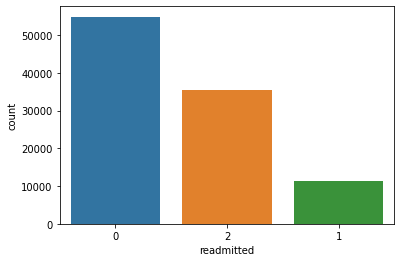

In [ ]:
sns.countplot(x='readmitted',data = patient_data_df_clean)

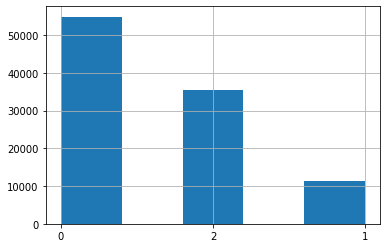

In [ ]:
patient_data_df_clean['readmitted'].hist(bins=5)

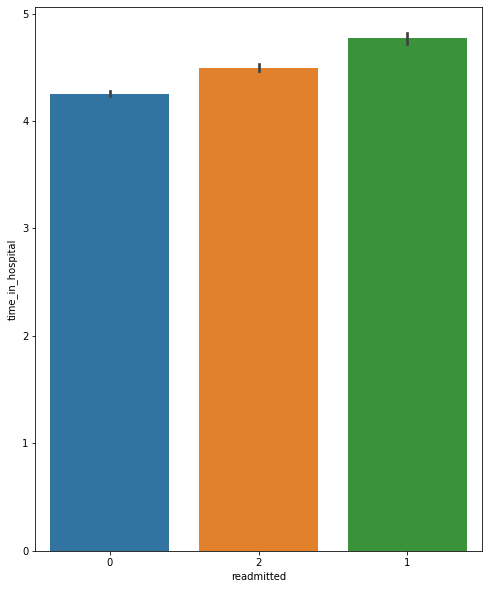

In [ ]:

plt.figure(figsize=(8,10))
sns.barplot(x='readmitted',y='time_in_hospital',data=patient_data_df_clean)

In [ ]:
variation = pd.get_dummies(patient_data_df_clean['readmitted'],drop_first=True)
variation

,1,2
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
101761,0,1
101762,0,0
101763,0,0
101764,0,0


In [ ]:
patient_data_df_clean['readmitted'] ==(patient_data_df_clean['readmitted'] == 1) 

0         False
1         False
2         False
3         False
4         False
          ...  
101761    False
101762    False
101763    False
101764    False
101765    False
Name: readmitted, Length: 101766, dtype: bool

In [ ]:
patient_data_df_clean.drop(['readmitted'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
patient_data_df_clean = pd.concat([patient_data_df_clean,variation],axis=1)
patient_data_df_clean.head(4)

,insulin,number_inpatient,time_in_hospital,1,2
0,No,0,1,0,0
1,Up,0,3,0,1
2,No,1,2,0,0
3,Up,0,2,0,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
patient_CountVectorizer = vectorizer.fit_transform(patient_data_df_clean['insulin'])

In [ ]:
patient_CountVectorizer.shape

(101766, 4)

In [ ]:
print(vectorizer.get_feature_names())

['down', 'no', 'steady', 'up']


In [ ]:
print(patient_CountVectorizer.toarray())

[[0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 ...
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]]


In [ ]:
patient_data_df_clean.drop(['insulin'],axis=1,inplace=True)
ins = pd.DataFrame(patient_CountVectorizer.toarray())

In [ ]:
patient_data_df_clean = pd.concat([patient_data_df_clean,ins],axis=1)
patient_data_df_clean 

,number_inpatient,time_in_hospital,1,2,0,1,2,3
0,0,1,0,0,0,1,0,0
1,0,3,0,1,0,0,0,1
2,1,2,0,0,0,1,0,0
3,0,2,0,0,0,0,0,1
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
101761,0,3,0,1,1,0,0,0
101762,1,5,0,0,0,0,1,0
101763,0,1,0,0,1,0,0,0
101764,1,10,0,0,0,0,0,1


In [ ]:
x = patient_data_df_clean
x

,number_inpatient,time_in_hospital,1,2,0,1,2,3
0,0,1,0,0,0,1,0,0
1,0,3,0,1,0,0,0,1
2,1,2,0,0,0,1,0,0
3,0,2,0,0,0,0,0,1
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
101761,0,3,0,1,1,0,0,0
101762,1,5,0,0,0,0,1,0
101763,0,1,0,0,1,0,0,0
101764,1,10,0,0,0,0,0,1


In [ ]:
y = patient_data_df_clean['number_inpatient']
y

0         0
1         0
2         1
3         0
4         0
         ..
101761    0
101762    1
101763    0
101764    1
101765    0
Name: number_inpatient, Length: 101766, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=5)

In [ ]:
x_train.shape

(81412, 8)

In [ ]:
y_train.shape

(81412,)

In [ ]:
x_test.shape

(20354, 8)

In [ ]:
y_test.shape

(20354,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
randomforest_classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict_train = randomforest_classifier.predict(x_train)
con_met = confusion_matrix(y_train,y_predict_train)

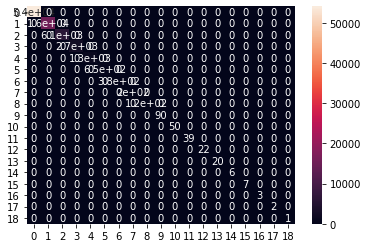

In [ ]:
sns.heatmap(con_met,annot=True)

In [ ]:
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54121
           1       1.00      1.00      1.00     15567
           2       1.00      1.00      1.00      6078
           3       1.00      1.00      1.00      2737
           4       1.00      1.00      1.00      1316
           5       1.00      1.00      1.00       648
           6       1.00      1.00      1.00       377
           7       1.00      1.00      1.00       203
           8       1.00      1.00      1.00       125
           9       1.00      1.00      1.00        90
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        39
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         3
          19       1.00    

In [ ]:
y_predict_train = randomforest_classifier.predict(x_test)
con_met = confusion_matrix(y_test,y_predict_train)

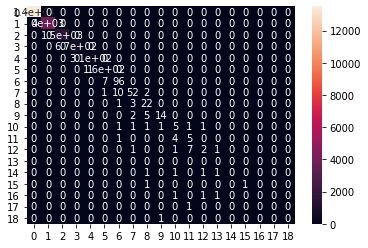

In [ ]:
sns.heatmap(con_met,annot=True)

In [ ]:
print(classification_report(y_test,y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13509
           1       1.00      1.00      1.00      3954
           2       1.00      1.00      1.00      1488
           3       1.00      1.00      1.00       674
           4       1.00      1.00      1.00       306
           5       0.95      0.99      0.97       164
           6       0.88      0.93      0.91       103
           7       0.88      0.80      0.84        65
           8       0.69      0.85      0.76        26
           9       0.88      0.67      0.76        21
          10       0.42      0.45      0.43        11
          11       0.36      0.50      0.42        10
          12       0.40      0.17      0.24        12
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         4
          15       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         3
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN Model for predicting DiabetesMed**

In [ ]:
patient_data_df_02 = df.copy()
patient_data_df_clean_knn = patient_data_df_02.replace('Unknown/Invalid',np.NaN)
patient_data_df_clean_knn = patient_data_df_02.replace('?',np.NaN)
patient_data_missing_values_knn = patient_data_df_clean_knn.isnull().sum()
patient_data_df_clean_knn

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
patient_data_missing_values_knn

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
print("% of missing values for each column")
missing_values_more_than_80=[]
for column in patient_data_df_clean_knn.columns:
  print(column,patient_data_missing_values_knn[column]/101766*100,"%") #101766 from df.shape done above
  if patient_data_missing_values_knn[column]/101766*100>80:
    missing_values_more_than_80.append(column)
print(missing_values_more_than_80)

% of missing values for each column
encounter_id 0.0 %
patient_nbr 0.0 %
race 2.2335554114340743 %
gender 0.0 %
age 0.0 %
weight 96.85847925633315 %
admission_type_id 0.0 %
discharge_disposition_id 0.0 %
admission_source_id 0.0 %
time_in_hospital 0.0 %
payer_code 39.5574160328597 %
medical_specialty 49.08220820313268 %
num_lab_procedures 0.0 %
num_procedures 0.0 %
num_medications 0.0 %
number_outpatient 0.0 %
number_emergency 0.0 %
number_inpatient 0.0 %
diag_1 0.02063557573256294 %
diag_2 0.3517874339170253 %
diag_3 1.398305917497003 %
number_diagnoses 0.0 %
max_glu_serum 0.0 %
A1Cresult 0.0 %
metformin 0.0 %
repaglinide 0.0 %
nateglinide 0.0 %
chlorpropamide 0.0 %
glimepiride 0.0 %
acetohexamide 0.0 %
glipizide 0.0 %
glyburide 0.0 %
tolbutamide 0.0 %
pioglitazone 0.0 %
rosiglitazone 0.0 %
acarbose 0.0 %
miglitol 0.0 %
troglitazone 0.0 %
tolazamide 0.0 %
examide 0.0 %
citoglipton 0.0 %
insulin 0.0 %
glyburide-metformin 0.0 %
glipizide-metformin 0.0 %
glimepiride-pioglitazone 0.0 %
met

In [ ]:
patient_data_df_clean_knn.drop(['diag_1','glipizide-metformin','rosiglitazone','examide','diag_2','diag_3','readmitted','citoglipton','glipizide','acetohexamide','number_emergency','number_outpatient','race','age','patient_nbr','encounter_id','discharge_disposition_id','admission_source_id','admission_type_id','weight','payer_code','medical_specialty'], axis = 1, inplace = True)

KeyError: ignored

In [ ]:
patient_data_df_clean_knn.head(20)

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glyburide,tolbutamide,pioglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,0,1,41,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,3,59,0,18,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2
2,0,2,11,5,13,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,1,2,44,1,16,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2
4,1,1,51,0,8,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,2
5,1,3,31,6,16,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2
6,1,4,70,1,21,0,7,0,0,2,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,1,2
7,1,5,73,0,12,0,8,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2
8,0,13,68,2,28,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,2
9,0,12,33,3,18,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,2


In [ ]:
patient_data_df_clean_knn['gender'] = patient_data_df_clean_knn['gender'].replace(['Female'],'0')
patient_data_df_clean_knn['gender'] = patient_data_df_clean_knn['gender'].replace(['Male'],'1')
patient_data_df_clean_knn['gender'] = patient_data_df_clean_knn['gender'].replace(['Unknown/Invalid'],'2')

patient_data_df_clean_knn['max_glu_serum'] = patient_data_df_clean_knn['max_glu_serum'].replace(['None'],'0')
patient_data_df_clean_knn['max_glu_serum'] = patient_data_df_clean_knn['max_glu_serum'].replace(['>300'],'1')
patient_data_df_clean_knn['max_glu_serum'] = patient_data_df_clean_knn['max_glu_serum'].replace(['Norm'],'2')
patient_data_df_clean_knn['max_glu_serum'] = patient_data_df_clean_knn['max_glu_serum'].replace(['>200'],'3')

patient_data_df_clean_knn['chlorpropamide'] = patient_data_df_clean_knn['chlorpropamide'].replace(['None'],'0')
patient_data_df_clean_knn['chlorpropamide'] = patient_data_df_clean_knn['chlorpropamide'].replace(['Up'],'1')
patient_data_df_clean_knn['chlorpropamide'] = patient_data_df_clean_knn['chlorpropamide'].replace(['Steady'],'2')
patient_data_df_clean_knn['chlorpropamide'] = patient_data_df_clean_knn['chlorpropamide'].replace(['Down'],'3')


patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['None'],'0')
patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['Up'],'1')
patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['Steady'],'2')
patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['Down'],'3')

patient_data_df_clean_knn['A1Cresult'] = patient_data_df_clean_knn['A1Cresult'].replace(['None'],'0')
patient_data_df_clean_knn['A1Cresult'] = patient_data_df_clean_knn['A1Cresult'].replace(['>8'],'1')
patient_data_df_clean_knn['A1Cresult'] = patient_data_df_clean_knn['A1Cresult'].replace(['Norm'],'2')
patient_data_df_clean_knn['A1Cresult'] = patient_data_df_clean_knn['A1Cresult'].replace(['>7'],'3')

patient_data_df_clean_knn['num_procedures'] = patient_data_df_clean_knn['num_procedures'].replace(['No'],'0')
patient_data_df_clean_knn['num_procedures'] = patient_data_df_clean_knn['num_procedures'].replace(['Up'],'1')
patient_data_df_clean_knn['num_procedures'] = patient_data_df_clean_knn['num_procedures'].replace(['Steady'],'2')
patient_data_df_clean_knn['num_procedures'] = patient_data_df_clean_knn['num_procedures'].replace(['Down'],'3')

patient_data_df_clean_knn['num_medications'] = patient_data_df_clean_knn['num_medications'].replace(['No'],'0')
patient_data_df_clean_knn['num_medications'] = patient_data_df_clean_knn['num_medications'].replace(['Up'],'1')
patient_data_df_clean_knn['num_medications'] = patient_data_df_clean_knn['num_medications'].replace(['Steady'],'2')
patient_data_df_clean_knn['num_medications'] = patient_data_df_clean_knn['num_medications'].replace(['Down'],'3')
#####



patient_data_df_clean_knn['number_diagnoses'] = patient_data_df_clean_knn['number_diagnoses'].replace(['No'],'0')
patient_data_df_clean_knn['number_diagnoses'] = patient_data_df_clean_knn['number_diagnoses'].replace(['Up'],'1')
patient_data_df_clean_knn['number_diagnoses'] = patient_data_df_clean_knn['number_diagnoses'].replace(['Steady'],'2')
patient_data_df_clean_knn['number_diagnoses'] = patient_data_df_clean_knn['number_diagnoses'].replace(['Down'],'3')


patient_data_df_clean_knn['max_glu_serum'] = patient_data_df_clean_knn['max_glu_serum'].replace(['No'],'0')
patient_data_df_clean_knn['max_glu_serum'] = patient_data_df_clean_knn['max_glu_serum'].replace(['Steady'],'2')


patient_data_df_clean_knn['A1Cresult'] = patient_data_df_clean_knn['A1Cresult'].replace(['No'],'0')
patient_data_df_clean_knn['A1Cresult'] = patient_data_df_clean_knn['A1Cresult'].replace(['Up'],'1')
patient_data_df_clean_knn['A1Cresult'] = patient_data_df_clean_knn['A1Cresult'].replace(['Steady'],'2')
patient_data_df_clean_knn['A1Cresult'] = patient_data_df_clean_knn['A1Cresult'].replace(['Down'],'3')


patient_data_df_clean_knn['metformin'] = patient_data_df_clean_knn['metformin'].replace(['No'],'0')
patient_data_df_clean_knn['metformin'] = patient_data_df_clean_knn['metformin'].replace(['Up'],'1')
patient_data_df_clean_knn['metformin'] = patient_data_df_clean_knn['metformin'].replace(['Steady'],'2')
patient_data_df_clean_knn['metformin'] = patient_data_df_clean_knn['metformin'].replace(['Down'],'3')


patient_data_df_clean_knn['repaglinide'] = patient_data_df_clean_knn['repaglinide'].replace(['No'],'0')
patient_data_df_clean_knn['repaglinide'] = patient_data_df_clean_knn['repaglinide'].replace(['Up'],'1')
patient_data_df_clean_knn['repaglinide'] = patient_data_df_clean_knn['repaglinide'].replace(['Steady'],'2')
patient_data_df_clean_knn['repaglinide'] = patient_data_df_clean_knn['repaglinide'].replace(['Down'],'3')


patient_data_df_clean_knn['num_medications'] = patient_data_df_clean_knn['num_medications'].replace(['No'],'0')
patient_data_df_clean_knn['num_medications'] = patient_data_df_clean_knn['num_medications'].replace(['Up'],'1')
patient_data_df_clean_knn['num_medications'] = patient_data_df_clean_knn['num_medications'].replace(['Steady'],'2')
patient_data_df_clean_knn['num_medications'] = patient_data_df_clean_knn['num_medications'].replace(['Down'],'3')


patient_data_df_clean_knn['nateglinide'] = patient_data_df_clean_knn['nateglinide'].replace(['No'],'0')
patient_data_df_clean_knn['nateglinide'] = patient_data_df_clean_knn['nateglinide'].replace(['Up'],'1')
patient_data_df_clean_knn['nateglinide'] = patient_data_df_clean_knn['nateglinide'].replace(['Steady'],'2')
patient_data_df_clean_knn['nateglinide'] = patient_data_df_clean_knn['nateglinide'].replace(['Down'],'3')


patient_data_df_clean_knn['chlorpropamide'] = patient_data_df_clean_knn['chlorpropamide'].replace(['No'],'0')
patient_data_df_clean_knn['chlorpropamide'] = patient_data_df_clean_knn['chlorpropamide'].replace(['Steady'],'2')


patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['No'],'0')
patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['Up'],'1')
patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['Steady'],'2')
patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['Down'],'3')

patient_data_df_clean_knn['miglitol'] = patient_data_df_clean_knn['miglitol'].replace(['No'],'0')
patient_data_df_clean_knn['miglitol'] = patient_data_df_clean_knn['miglitol'].replace(['Up'],'1')
patient_data_df_clean_knn['miglitol'] = patient_data_df_clean_knn['miglitol'].replace(['Steady'],'2')
patient_data_df_clean_knn['miglitol'] = patient_data_df_clean_knn['miglitol'].replace(['Down'],'3')


patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['No'],'0')
patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['Up'],'1')
patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['Steady'],'2')
patient_data_df_clean_knn['glimepiride'] = patient_data_df_clean_knn['glimepiride'].replace(['Down'],'3')

patient_data_df_clean_knn['glyburide-metformin'] = patient_data_df_clean_knn['glyburide-metformin'].replace(['No'],'0')
patient_data_df_clean_knn['glyburide-metformin'] = patient_data_df_clean_knn['glyburide-metformin'].replace(['Up'],'1')
patient_data_df_clean_knn['glyburide-metformin'] = patient_data_df_clean_knn['glyburide-metformin'].replace(['Steady'],'2')
patient_data_df_clean_knn['glyburide-metformin'] = patient_data_df_clean_knn['glyburide-metformin'].replace(['Down'],'3')


patient_data_df_clean_knn['insulin'] = patient_data_df_clean_knn['insulin'].replace(['No'],'0')
patient_data_df_clean_knn['insulin'] = patient_data_df_clean_knn['insulin'].replace(['Up'],'1')
patient_data_df_clean_knn['insulin'] = patient_data_df_clean_knn['insulin'].replace(['Steady'],'2')
patient_data_df_clean_knn['insulin'] = patient_data_df_clean_knn['insulin'].replace(['Down'],'3')


patient_data_df_clean_knn['glimepiride-pioglitazone'] = patient_data_df_clean_knn['glimepiride-pioglitazone'].replace(['No'],'0')
patient_data_df_clean_knn['glimepiride-pioglitazone'] = patient_data_df_clean_knn['glimepiride-pioglitazone'].replace(['Steady'],'2')


patient_data_df_clean_knn['metformin-rosiglitazone'] = patient_data_df_clean_knn['metformin-rosiglitazone'].replace(['No'],'0')
patient_data_df_clean_knn['metformin-rosiglitazone'] = patient_data_df_clean_knn['metformin-rosiglitazone'].replace(['Steady'],'2')



patient_data_df_clean_knn['metformin-pioglitazone'] = patient_data_df_clean_knn['metformin-pioglitazone'].replace(['No'],'0')
patient_data_df_clean_knn['metformin-pioglitazone'] = patient_data_df_clean_knn['metformin-pioglitazone'].replace(['Steady'],'2')


patient_data_df_clean_knn['change'] = patient_data_df_clean_knn['change'].replace(['No'],'0')
patient_data_df_clean_knn['change'] = patient_data_df_clean_knn['change'].replace(['Ch'],'1')


patient_data_df_clean_knn['glyburide'] = patient_data_df_clean_knn['glyburide'].replace(['No'],'0')
patient_data_df_clean_knn['glyburide'] = patient_data_df_clean_knn['glyburide'].replace(['Up'],'1')
patient_data_df_clean_knn['glyburide'] = patient_data_df_clean_knn['glyburide'].replace(['Steady'],'2')
patient_data_df_clean_knn['glyburide'] = patient_data_df_clean_knn['glyburide'].replace(['Down'],'3')


patient_data_df_clean_knn['tolbutamide'] = patient_data_df_clean_knn['tolbutamide'].replace(['No'],'0')
patient_data_df_clean_knn['tolbutamide'] = patient_data_df_clean_knn['tolbutamide'].replace(['Up'],'1')
patient_data_df_clean_knn['tolbutamide'] = patient_data_df_clean_knn['tolbutamide'].replace(['Steady'],'2')
patient_data_df_clean_knn['tolbutamide'] = patient_data_df_clean_knn['tolbutamide'].replace(['Down'],'3')


patient_data_df_clean_knn['pioglitazone'] = patient_data_df_clean_knn['pioglitazone'].replace(['No'],'0')
patient_data_df_clean_knn['pioglitazone'] = patient_data_df_clean_knn['pioglitazone'].replace(['Up'],'1')
patient_data_df_clean_knn['pioglitazone'] = patient_data_df_clean_knn['pioglitazone'].replace(['Steady'],'2')
patient_data_df_clean_knn['pioglitazone'] = patient_data_df_clean_knn['pioglitazone'].replace(['Down'],'3')




patient_data_df_clean_knn['diabetesMed'] = patient_data_df_clean_knn['diabetesMed'].replace(['No'],'0')
patient_data_df_clean_knn['diabetesMed'] = patient_data_df_clean_knn['diabetesMed'].replace(['Yes'],'2')
patient_data_df_clean_knn['acarbose'] = patient_data_df_clean_knn['acarbose'].replace(['No'],'0')
patient_data_df_clean_knn['acarbose'] = patient_data_df_clean_knn['acarbose'].replace(['Steady'],'2')

patient_data_df_clean_knn['acarbose'] = patient_data_df_clean_knn['acarbose'].replace(['Up'],'1')
patient_data_df_clean_knn['acarbose'] = patient_data_df_clean_knn['acarbose'].replace(['Down'],'3')

patient_data_df_clean_knn['miglitol'] = patient_data_df_clean_knn['pioglitazone'].replace(['No'],'0')
patient_data_df_clean_knn['miglitol'] = patient_data_df_clean_knn['miglitol'].replace(['Steady'],'2')



patient_data_df_clean_knn['troglitazone'] = patient_data_df_clean_knn['troglitazone'].replace(['No'],'0')
patient_data_df_clean_knn['troglitazone'] = patient_data_df_clean_knn['troglitazone'].replace(['Steady'],'1')



patient_data_df_clean_knn['tolazamide'] = patient_data_df_clean_knn['tolazamide'].replace(['No'],'0')
patient_data_df_clean_knn['tolazamide'] = patient_data_df_clean_knn['tolazamide'].replace(['Steady'],'1')
patient_data_df_clean_knn['tolazamide'] = patient_data_df_clean_knn['tolazamide'].replace(['Up'],'1')




patient_data_df_clean_knn['metformin'] = patient_data_df_clean_knn['metformin'].replace(['No'],'0')
patient_data_df_clean_knn['metformin'] = patient_data_df_clean_knn['metformin'].replace(['Up'],'1')
patient_data_df_clean_knn['metformin'] = patient_data_df_clean_knn['metformin'].replace(['Steady'],'2')
patient_data_df_clean_knn['metformin'] = patient_data_df_clean_knn['metformin'].replace(['Down'],'3')


patient_data_df_clean_knn['chlorpropamide'] = patient_data_df_clean_knn['chlorpropamide'].replace(['No'],'0')
patient_data_df_clean_knn['chlorpropamide'] = patient_data_df_clean_knn['chlorpropamide'].replace(['Up'],'1')
patient_data_df_clean_knn['chlorpropamide'] = patient_data_df_clean_knn['chlorpropamide'].replace(['Steady'],'2')
patient_data_df_clean_knn['chlorpropamide'] = patient_data_df_clean_knn['chlorpropamide'].replace(['Down'],'3')


patient_data_df_clean_knn['nateglinide'] = patient_data_df_clean_knn['nateglinide'].replace(['No'],'0')
patient_data_df_clean_knn['nateglinide'] = patient_data_df_clean_knn['nateglinide'].replace(['Up'],'1')
patient_data_df_clean_knn['nateglinide'] = patient_data_df_clean_knn['nateglinide'].replace(['Steady'],'2')
patient_data_df_clean_knn['nateglinide'] = patient_data_df_clean_knn['nateglinide'].replace(['Down'],'3')


patient_data_df_clean_knn['pioglitazone'] = patient_data_df_clean_knn['pioglitazone'].replace(['No'],'0')
patient_data_df_clean_knn['pioglitazone'] = patient_data_df_clean_knn['pioglitazone'].replace(['Up'],'1')
patient_data_df_clean_knn['pioglitazone'] = patient_data_df_clean_knn['pioglitazone'].replace(['Steady'],'2')
patient_data_df_clean_knn['pioglitazone'] = patient_data_df_clean_knn['pioglitazone'].replace(['Down'],'3')


In [ ]:
for column in patient_data_df_clean_knn:
  print(column)
  print(patient_data_df_clean_knn[column].unique())

gender
['0' '1' '2']
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
num_lab_procedures
[ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]
num_procedures
[0 5 1 6 2 3 4]
num_medications
[ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 27 25  4
 32  6 30 26 24 33  5 39  3 29 61 40 46 41 36 34 35 50 43 42 37 51 38 45
 54 52 49 62 55 47 44 53 48 57 59 56 60 63 58 70 67 64 69 65 68 66 81 79
 75 72 74]
number_inpatient
[ 0  1  2  3  6  5  4  7  8  9 15 10 11 14 12 13 17 16 21 18 19]
number_diagnoses
[ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 

In [ ]:
patient_data_df_clean_knn.head()

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glyburide,tolbutamide,pioglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,0,1,41,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,3,59,0,18,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2
2,0,2,11,5,13,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,1,2,44,1,16,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2
4,1,1,51,0,8,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,2


**KNN Model Code**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [ ]:
scaler = StandardScaler()
scaler.fit(patient_data_df_clean_knn.drop('diabetesMed', axis=1))
StandardScaler(copy=True,with_mean=True,with_std=True)
scaled_features=scaler.transform(patient_data_df_clean_knn.drop('diabetesMed',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=patient_data_df_clean_knn.columns[:-1])
df_feat.head()

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glyburide,tolbutamide,pioglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
0,-0.927397,-1.137649,-0.106517,-0.785398,-1.848268,-0.503276,-3.321596,-0.221528,-0.400261,-0.488081,-0.122323,-0.082879,-0.028786,-0.22878,-0.335765,-0.015035,-0.276756,-0.054805,-0.276756,-0.00543,-0.01958,-0.966607,-0.083374,-0.003135,-0.004433,-0.003135,-0.926591
1,-0.927397,-0.467653,0.808384,-0.785398,0.243390,-0.503276,0.815784,-0.221528,-0.400261,-0.488081,-0.122323,-0.082879,-0.028786,-0.22878,-0.335765,-0.015035,-0.276756,-0.054805,-0.276756,-0.00543,-0.01958,-0.069648,-0.083374,-0.003135,-0.004433,-0.003135,1.079225
2,-0.927397,-0.802651,-1.631351,2.145781,-0.371804,0.288579,-0.735733,-0.221528,-0.400261,-0.488081,-0.122323,-0.082879,-0.028786,-0.22878,-0.335765,-0.015035,-0.276756,-0.054805,-0.276756,-0.00543,-0.01958,-0.966607,-0.083374,-0.003135,-0.004433,-0.003135,-0.926591
3,1.078031,-0.802651,0.045967,-0.199162,-0.002688,-0.503276,-0.218561,-0.221528,-0.400261,-0.488081,-0.122323,-0.082879,-0.028786,-0.22878,-0.335765,-0.015035,-0.276756,-0.054805,-0.276756,-0.00543,-0.01958,-0.069648,-0.083374,-0.003135,-0.004433,-0.003135,1.079225
4,1.078031,-1.137649,0.401761,-0.785398,-0.986997,-0.503276,-1.252906,-0.221528,-0.400261,-0.488081,-0.122323,-0.082879,-0.028786,-0.22878,-0.335765,-0.015035,-0.276756,-0.054805,-0.276756,-0.00543,-0.01958,0.827311,-0.083374,-0.003135,-0.004433,-0.003135,1.079225


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features,df['diabetesMed'],test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=1,p=2,weights='uniform')
pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[ 5833  1182]
 [ 1141 22374]]
              precision    recall  f1-score   support

          No       0.84      0.83      0.83      7015
         Yes       0.95      0.95      0.95     23515

    accuracy                           0.92     30530
   macro avg       0.89      0.89      0.89     30530
weighted avg       0.92      0.92      0.92     30530



Text(0, 0.5, 'Error Rate')

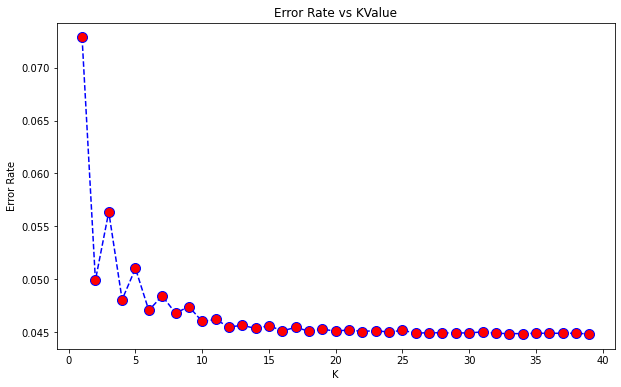

In [ ]:
error_rate=[]
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs KValue')
plt.xlabel('K')
plt.ylabel('Error Rate')